### Dimensionamiento de Flota de Transporte

In [1]:
import scipy.spatial as sps
from scipy.stats import norm
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import math

#### Formato

In [2]:
def setfs ( s ):
    font = {'family' : 'Times New Roman',
            'weight' : 'normal',
            'size'   : s}
    matplotlib.rc('font', **font)
   
setfs ( 11 ) 

#### Directorio

In [3]:
repdir= './reportes/'
#os.mkdir(repdir)

#### Load Data

In [4]:
with open(repdir +'CAEX-793D.dat','r') as f:
    f.readline()
    ncols = int(f.readline())

In [5]:
data = pd.read_csv(repdir +'CAEX-793D.dat',header=None,skiprows=ncols+2,sep='\s+',na_values=-999)
print("Data loaded, size: ",data.values.shape,flush=True)
data.rename(columns={0:'Cycle Time (m) Truck',1:'Cycle Time (m) Exc',2:'Loader Passes',3:'Payload(tonnes)',4:'ton/passes',5:'Cycle Time (m)'}, inplace=True)
data.head()

Data loaded, size:  (1258, 6)


,Cycle Time (m) Truck,Cycle Time (m) Exc,Loader Passes,Payload(tonnes),ton/passes,Cycle Time (m)
0,18.78,2.33,4,239.8,59.95,16.45
1,20.58,2.15,4,239.1,59.78,18.43
2,20.17,2.05,4,235.0,58.75,18.12
3,31.72,1.92,4,223.4,55.85,29.80
4,17.70,1.82,4,217.6,54.40,15.88


In [6]:
data=data.values                        # .Values transforma la dataframe.
ndata=data.shape[0]                     # Numeros de datos en el archivo de muestras.
y=data[:,0]                             # ciclos de transporte total.
z=data[:,1]                             # ciclo de carguio total.
y1=data[:,5]                            # ciclo de transporte total sin carguio.

#### Analisis Estadistico

In [7]:
ymean=np.mean(y)                        
ymedian=np.median(y)
ystd=np.std(y)
ymin=np.min(y)
ymax=np.max(y)

print('\033[1m' +'Estadisticas de Ciclo de Transporte total:'+'\033[0m')
print('Media',"{0:.3f}".format(ymean))
print('Mediana',"{0:.3f}".format(ymedian))
print('Desviacion estandar',"{0:.3f}".format(ystd))
print('Valor Minimo',"{0:.3f}".format(ymin))
print('Valor Maximo',"{0:.3f}".format(ymax))

print('')

zmean=np.mean(z)
zmedian=np.median(z)
zstd=np.std(z)
zmin=np.min(z)
zmax=np.max(z)

print('\033[1m' +'Estadisticas de Ciclo de Carguio total:'+'\033[0m')
print('Media',"{0:.3f}".format(zmean))
print('Mediana',"{0:.4f}".format(zmedian))
print('Desviacion estandar',"{0:.4f}".format(zstd))
print('Valor Minimo',"{0:.3f}".format(zmin))
print('Valor Maximo',"{0:.3f}".format(zmax))

Estadisticas de Ciclo de Transporte total:
Media 20.784
Mediana 20.070
Desviacion estandar 2.900
Valor Minimo 15.920
Valor Maximo 37.720

Estadisticas de Ciclo de Carguio total:
Media 2.019
Mediana 1.9300
Desviacion estandar 0.4249
Valor Minimo 1.300
Valor Maximo 5.130


In [8]:
def ecdf(data):                               # Plot of ECDF.
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    plt.figure(figsize=(10,5),dpi=100)
    plt.plot(x,y,'b-.', label='Valores')
    plt.legend(loc="lower right")
    plt.title('Dsitribucion de Frecuencia Acumulada')
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    return(x,y)

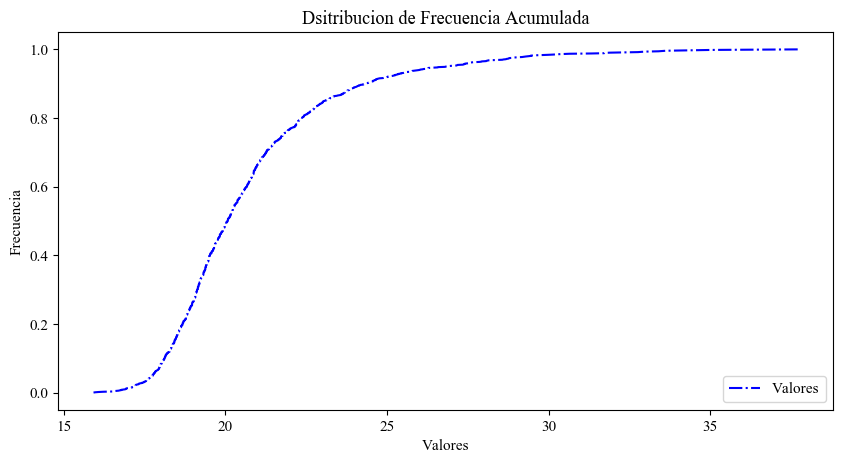

In [9]:
Prob,Valor=ecdf(y)                           # Distribucion Acumulada de Frecuencia de Camiones

In [10]:
def Val_ecdf(y,Prob):                          # Busca el Valor del Ciclo segun el ECDF.
    Prob=Prob
    yx = np.sort(y)
    n = yx.size
    yy = np.arange(1, n+1) / n
    idx = (np.abs(yy-Prob)).argmin()
    value=yx[idx]
    print('value',"{0:.2f}".format(value) ,'Prob:',"{0:.2f}".format(Prob))
    return[value,Prob]

In [11]:
def Pr_ecdf(y,value):                          # Busca el Valor del ECDF segun el ciclo.
    value=value
    yx = np.sort(y)
    n = yx.size
    yy = np.arange(1, n+1) / n
    idx = (np.abs(yx-value)).argmin()
    Prob=yy[idx]
    print('value',"{0:.2f}".format(value) ,'Prob:',"{0:.2f}".format(Prob))
    return[value,Prob]

In [12]:
Value1,Prob1 =Pr_ecdf(y,ymean)                # Valor de la Media
Value2,Prob2 =Pr_ecdf(y,ymedian)              # Valor de la Mediana

value 20.78 Prob: 0.62
value 20.07 Prob: 0.50


#### Histograma de Distribucion de Ciclos de Tranporte Total

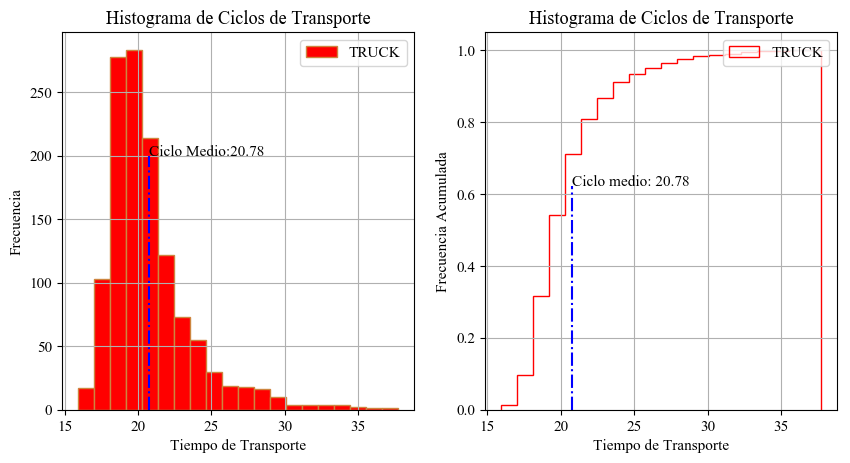

In [13]:
plt.figure(figsize=(10,5),dpi=100)
plt.subplot(1,2,1)
plt.hist(y, 20 , color= 'r' ,label='TRUCK',histtype='bar',edgecolor='peru')
plt.legend(loc="upper right")
plt.xlabel('Tiempo de Transporte')
plt.ylabel('Frecuencia')
plt.plot([ymean,ymean],[0,200],'b-.')
plt.text(ymean,200,'Ciclo Medio:'+"{0:.2f}".format(ymean))
plt.title('Histograma de Ciclos de Transporte')
plt.grid()

plt.subplot(1,2,2)
plt.hist(y, 20 , color= 'r' ,label='TRUCK',cumulative=True,density=True ,histtype='step')
plt.legend(loc="upper right")
plt.xlabel('Tiempo de Transporte')
plt.ylabel('Frecuencia Acumulada')
plt.plot([Value1,Value1],[0,Prob1],'b-.')
plt.text(Value1,Prob1,'Ciclo medio: '+"{0:.2f}".format(Value1))
plt.title('Histograma de Ciclos de Transporte')
plt.grid()
plt.show() 

#### Histograma de Distribucion de Ciclos de Tranporte total (sin carguio)

In [14]:
ymean=np.mean(y1)                        
ymedian=np.median(y1)
ystd=np.std(y1)
y1min=np.min(y1)
y2max=np.max(y1)

print('\033[1m' +'Estadisticas de Ciclo de Transporte sin carguio:'+'\033[0m')
print('Media',"{0:.3f}".format(ymean))
print('Mediana',"{0:.3f}".format(ymedian))
print('Desviacion estandar',"{0:.3f}".format(ystd))
print('Valor Minimo',"{0:.3f}".format(y1min))
print('Valor Maximo',"{0:.3f}".format(y2max))

Estadisticas de Ciclo de Transporte sin carguio:
Media 18.765
Mediana 18.040
Desviacion estandar 2.801
Valor Minimo 14.250
Valor Maximo 35.220


In [15]:
Value1,Prob1 =Pr_ecdf(y1,ymean)                # Valor de la Media
Value2,Prob2 =Pr_ecdf(y1,ymedian)              # Valor de la Mediana

value 18.76 Prob: 0.64
value 18.04 Prob: 0.50


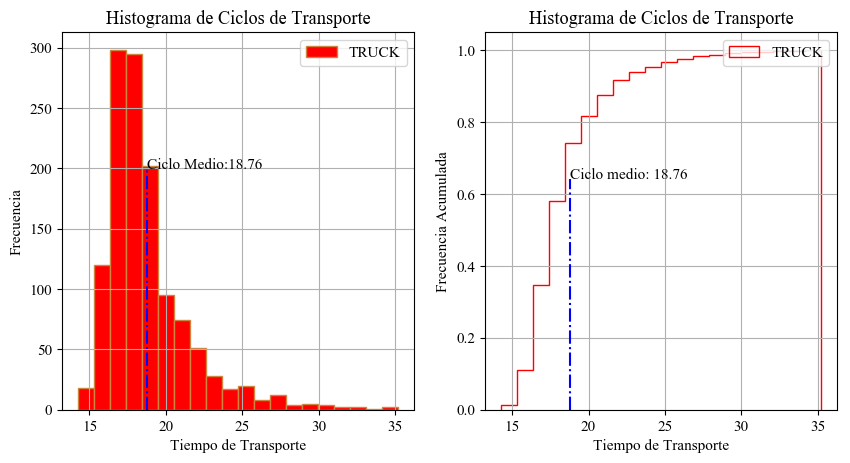

In [16]:
plt.figure(figsize=(10,5),dpi=100)
plt.subplot(1,2,1)
plt.hist(y1, 20 , color= 'r' ,label='TRUCK',histtype='bar',edgecolor='peru')
plt.legend(loc="upper right")
plt.xlabel('Tiempo de Transporte')
plt.ylabel('Frecuencia')
plt.plot([ymean,ymean],[0,200],'b-.')
plt.text(ymean,200,'Ciclo Medio:'+"{0:.2f}".format(ymean))
plt.title('Histograma de Ciclos de Transporte')
plt.grid()

plt.subplot(1,2,2)
plt.hist(y1, 20 , color= 'r' ,label='TRUCK',cumulative=True,density=True ,histtype='step')
plt.legend(loc="upper right")
plt.xlabel('Tiempo de Transporte')
plt.ylabel('Frecuencia Acumulada')
plt.plot([Value1,Value1],[0,Prob1],'b-.')
plt.text(Value1,Prob1,'Ciclo medio: '+"{0:.2f}".format(Value1))
plt.title('Histograma de Ciclos de Transporte')
plt.grid()
plt.show() 

In [17]:
Value1,Prob1 =Pr_ecdf(z,zmean)              # Valor de la Media
Value2,Prob2 =Pr_ecdf(z,zmedian)            # Valor de la Mediana

value 2.02 Prob: 0.58
value 1.93 Prob: 0.50


#### Ajuste de  datos a curvas de distribucion.

In [18]:
import scipy
import seaborn as sns

# Ajuste para un distribucion Lognormal
fitting_params_lognormal = scipy.stats.lognorm.fit(y)
lognorm_dist_fitted = scipy.stats.lognorm(*fitting_params_lognormal)
print('Parametros de ajuste lognormal:',"{0:.3f}".format(fitting_params_lognormal[0]),
      "{0:.3f}".format(fitting_params_lognormal[1]),"{0:.3f}".format(fitting_params_lognormal[2]))

# Ajuste para un distribucion inversa
fitting_params_invgauss = scipy.stats.invgauss.fit(y)
invgauss_dist_fitted =  scipy.stats.invgauss(*fitting_params_invgauss)
print('Parametros de ajuste invgauss:',"{0:.3f}".format(fitting_params_invgauss[0]),
      "{0:.3f}".format(fitting_params_invgauss[1]),"{0:.3f}".format(fitting_params_invgauss[2]))

# Ajuste para un distribucion Pearson3
fitting_params_pearson3 = scipy.stats.pearson3.fit(y)
pearson3_dist_fitted = scipy.stats.pearson3(*fitting_params_pearson3)
print('Parametros de ajuste invgauss:',"{0:.3f}".format(fitting_params_pearson3[0]),
      "{0:.3f}".format(fitting_params_pearson3[1]),"{0:.3f}".format(fitting_params_pearson3[2]))

Parametros de ajuste lognormal: 0.464 15.214 4.984
Parametros de ajuste invgauss: 0.214 14.949 27.241
Parametros de ajuste invgauss: 1.048 20.784 2.617


58.62284234185629 0 0.3545368636912254


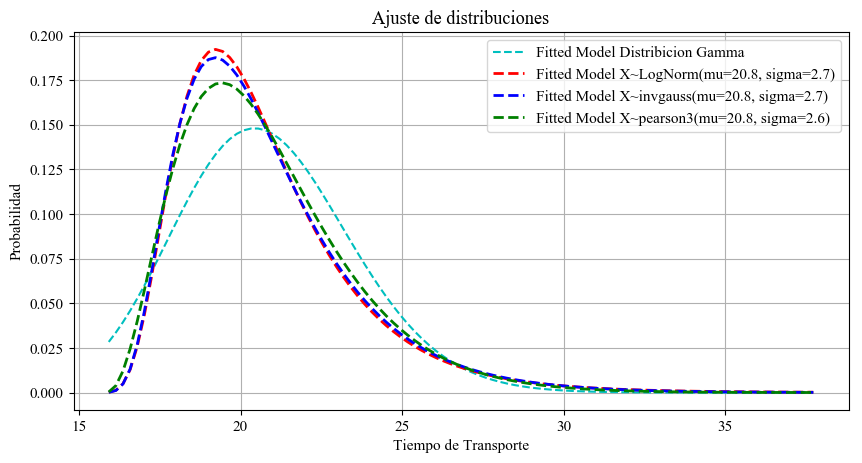

In [19]:
from scipy.stats import gamma

# Ajuste para un distribucion Gamma
x = np.linspace(np.min(y), np.max(y),100)
shape, loc, scale = gamma.fit(y, floc=0)
print(shape, loc, scale)
plt.figure(figsize=(10,5),dpi=100)
yx = gamma.pdf(x, shape, loc, scale)
plt.title('Ajuste de distribuciones')
plt.plot(x, yx,'c--', color='c',label='Fitted Model Distribicion Gamma')
plt.plot(x, lognorm_dist_fitted.pdf(x),'r--',lw=2, color='r',label='Fitted Model X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(lognorm_dist_fitted.mean(), lognorm_dist_fitted.std()))
plt.plot(x, invgauss_dist_fitted.pdf(x),'b--', lw=2, color='b',label='Fitted Model X~invgauss(mu={0:.1f}, sigma={1:.1f})'.format(invgauss_dist_fitted.mean(), invgauss_dist_fitted.std()))
plt.plot(x, pearson3_dist_fitted.pdf(x),'g--', lw=2, color='g',label='Fitted Model X~pearson3(mu={0:.1f}, sigma={1:.1f})'.format(pearson3_dist_fitted.mean(), pearson3_dist_fitted.std()))
plt.legend(loc='upper right',fontsize='medium')
plt.xlabel('Tiempo de Transporte')
plt.ylabel('Probabilidad')
plt.grid()
plt.show()

### Ajuste de los datos a una Distribucion Lognormal Ciclo de Transporte Total

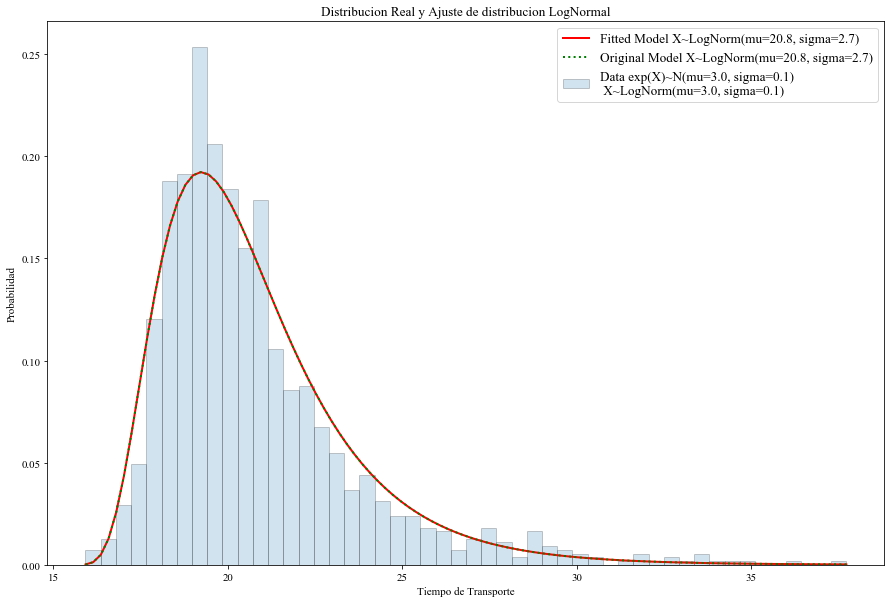

In [20]:
ylog=np.log(y)
mu=np.mean(ylog)
sigma=np.std(ylog)

fitting_params_lognormal = scipy.stats.lognorm.fit(y)
s1,loc1,scale1 = scipy.stats.lognorm.fit(y)
lognorm_dist_fitted = scipy.stats.lognorm(*fitting_params_lognormal)
t = np.linspace(np.min(y), np.max(y), 100)

lognorm_dist = scipy.stats.lognorm(s=s1, loc=loc1, scale=scale1)
# Plot lognormals
f, ax = plt.subplots(1, sharex='col', figsize=(15, 10))
ax.hist(y,50 ,density=True, histtype='bar', alpha=0.2 ,label='Data exp(X)~N(mu={0:.1f}, sigma={1:.1f})\n X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(mu, sigma),edgecolor='black')
ax.plot(t, lognorm_dist_fitted.pdf(t), lw=2, color='r',label='Fitted Model X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(lognorm_dist_fitted.mean(), lognorm_dist_fitted.std()))
ax.plot(t, lognorm_dist.pdf(t), lw=2, color='g', ls=':',label='Original Model X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(lognorm_dist.mean(), lognorm_dist.std()))
ax.legend(loc='upper right',fontsize='large')
plt.title('Distribucion Real y Ajuste de distribucion LogNormal')
plt.ylabel('Probabilidad')
plt.xlabel('Tiempo de Transporte')
plt.show()

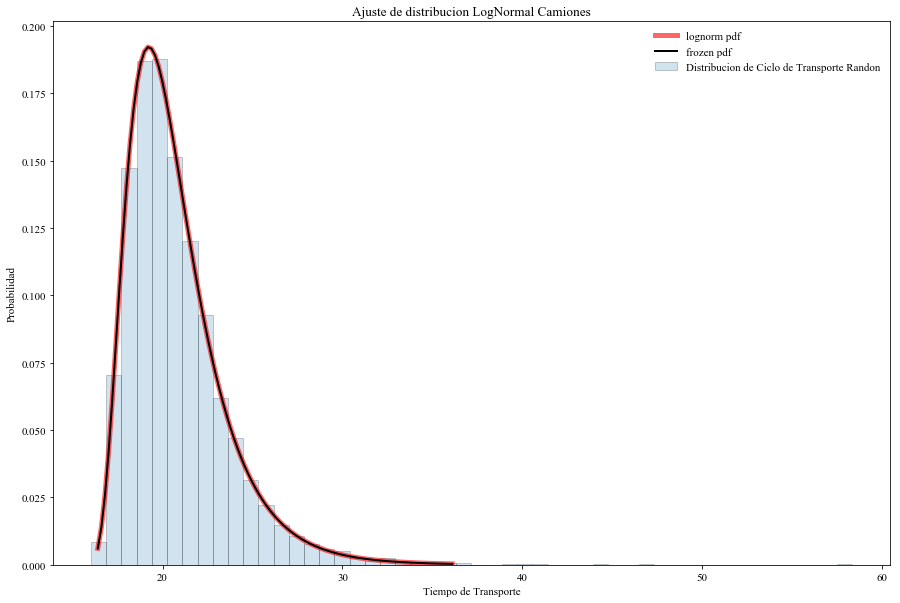

In [21]:
from scipy.stats import lognorm

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
s=s1
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')
x = np.linspace(lognorm.ppf(0.001, s,loc=loc1, scale=scale1),lognorm.ppf(0.999, s,loc=loc1, scale=scale1), 100)
ax.plot(x, lognorm.pdf(x, s, loc=loc1, scale=scale1),'r-', lw=5, alpha=0.6, label='lognorm pdf')

rv = lognorm(s ,loc=loc1, scale=scale1)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = lognorm.ppf([0.001, 0.5, 0.999], s)
np.allclose([0.001, 0.5, 0.999], lognorm.cdf(vals, s))
r1 = lognorm.rvs(s,loc=loc1, scale=scale1, size=10000)       # Ciclo de transporte total

ax.hist(r1,50 ,density=True, histtype='bar', alpha=0.2 ,label='Distribucion de Ciclo de Transporte Randon',edgecolor='black')
ax.legend(loc='best', frameon=False)
plt.title('Ajuste de distribucion LogNormal Camiones')
plt.ylabel('Probabilidad')
plt.xlabel('Tiempo de Transporte')
plt.xlim=(15,40)
plt.show()

### Ajuste de los datos a una Distribucion Lognormal Ciclo de Transporte Total (sin carguio)

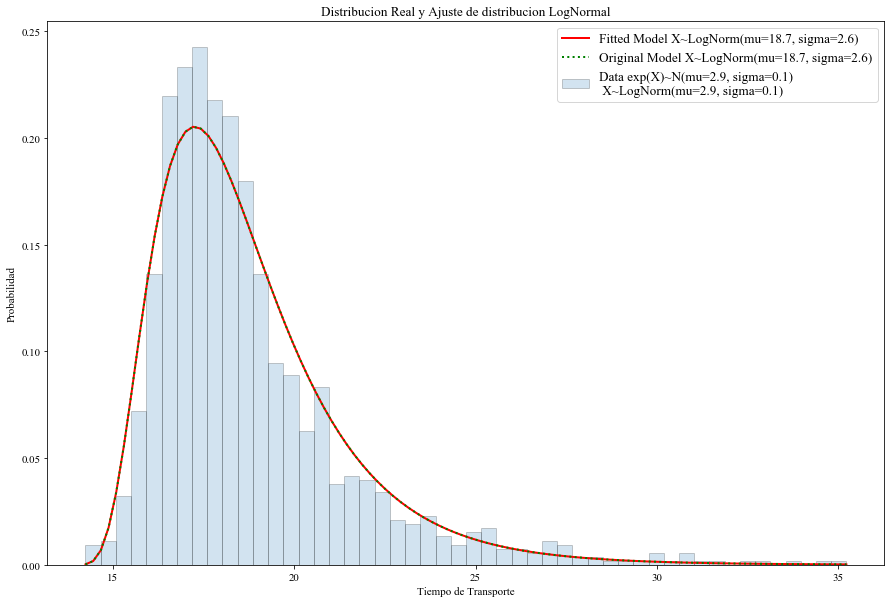

In [22]:
ylog=np.log(y1)
mu=np.mean(ylog)
sigma=np.std(ylog)

fitting_params_lognormal = scipy.stats.lognorm.fit(y1)
s1,loc1,scale1 = scipy.stats.lognorm.fit(y1)
lognorm_dist_fitted = scipy.stats.lognorm(*fitting_params_lognormal)
t = np.linspace(np.min(y1), np.max(y1), 100)

lognorm_dist = scipy.stats.lognorm(s=s1, loc=loc1, scale=scale1)
# Plot lognormals
f, ax = plt.subplots(1, sharex='col', figsize=(15, 10))
ax.hist(y1,50 ,density=True, histtype='bar', alpha=0.2 ,label='Data exp(X)~N(mu={0:.1f}, sigma={1:.1f})\n X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(mu, sigma),edgecolor='black')
ax.plot(t, lognorm_dist_fitted.pdf(t), lw=2, color='r',label='Fitted Model X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(lognorm_dist_fitted.mean(), lognorm_dist_fitted.std()))
ax.plot(t, lognorm_dist.pdf(t), lw=2, color='g', ls=':',label='Original Model X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(lognorm_dist.mean(), lognorm_dist.std()))
ax.legend(loc='upper right',fontsize='large')
plt.title('Distribucion Real y Ajuste de distribucion LogNormal')
plt.ylabel('Probabilidad')
plt.xlabel('Tiempo de Transporte')
plt.show()

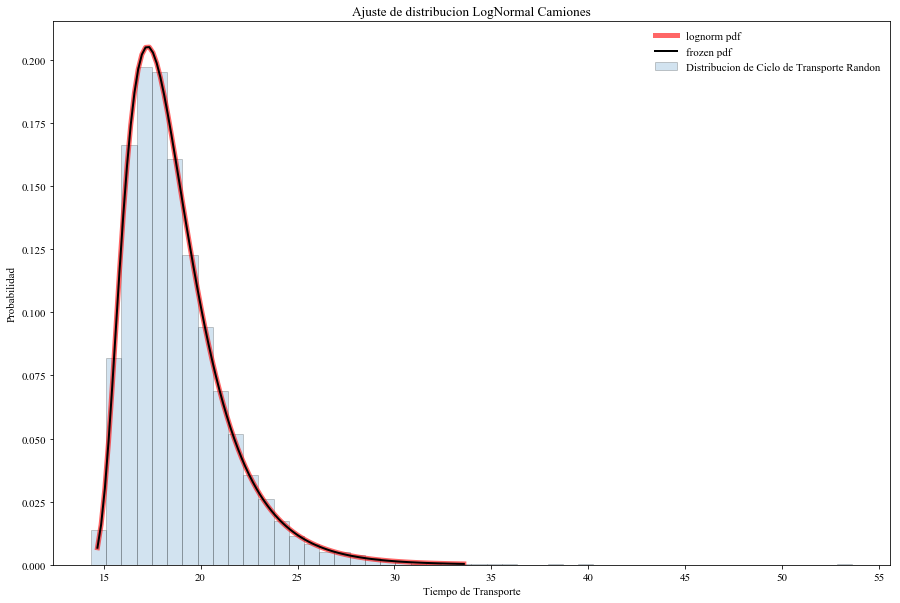

In [23]:
from scipy.stats import lognorm

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
s=s1
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')
x = np.linspace(lognorm.ppf(0.001, s,loc=loc1, scale=scale1),lognorm.ppf(0.999, s,loc=loc1, scale=scale1), 100)
ax.plot(x, lognorm.pdf(x, s, loc=loc1, scale=scale1),'r-', lw=5, alpha=0.6, label='lognorm pdf')

rv = lognorm(s ,loc=loc1, scale=scale1)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = lognorm.ppf([0.001, 0.5, 0.999], s)
np.allclose([0.001, 0.5, 0.999], lognorm.cdf(vals, s))
r2 = lognorm.rvs(s,loc=loc1, scale=scale1, size=10000)       # Ciclo de transporte sin carguio


ax.hist(r2,50 ,density=True, histtype='bar', alpha=0.2 ,label='Distribucion de Ciclo de Transporte Randon',edgecolor='black')
ax.legend(loc='best', frameon=False)
plt.title('Ajuste de distribucion LogNormal Camiones')
plt.ylabel('Probabilidad')
plt.xlabel('Tiempo de Transporte')
plt.xlim=(15,40)
plt.show()

#### Histograma Distribucion de Ciclos de Carguio

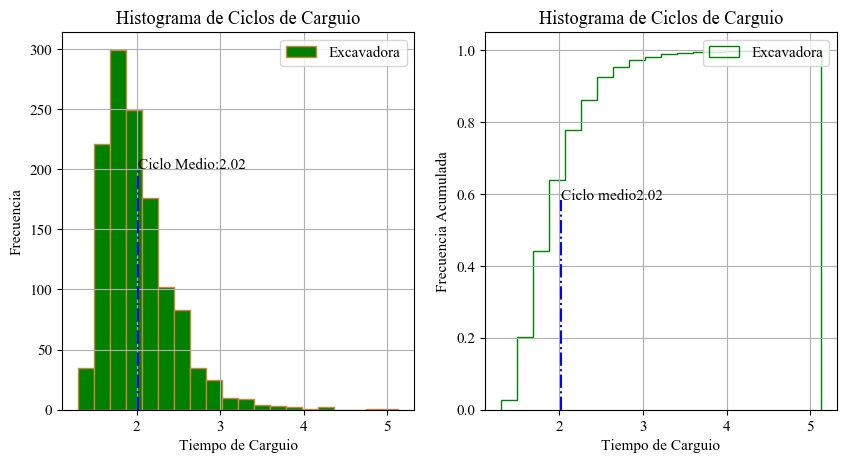

In [24]:
plt.figure(figsize=(10,5),dpi=100)
plt.subplot(1,2,1)
plt.hist(z, 20 , color= 'g' ,label='Excavadora',histtype='bar',edgecolor='peru')
plt.legend(loc="upper right")
plt.xlabel('Tiempo de Carguio')
plt.ylabel('Frecuencia')
plt.plot([zmean,zmean],[0,200],'b-.')
plt.text(zmean,200,'Ciclo Medio:'+"{0:.2f}".format(zmean))
plt.title('Histograma de Ciclos de Carguio')
plt.grid()

plt.subplot(1,2,2)
plt.hist(z, 20 , color= 'g' ,label='Excavadora',cumulative=True,density=True ,histtype='step')
plt.legend(loc="upper right")
plt.xlabel('Tiempo de Carguio')
plt.ylabel('Frecuencia Acumulada')
plt.plot([Value1,Value1],[0,Prob1],'b-.')
plt.text(Value1,Prob1,'Ciclo medio'+"{0:.2f}".format(Value1))
plt.title('Histograma de Ciclos de Carguio')
plt.grid()
plt.show() 

### Ajuste de los datos a una Distribucion Lognormal Ciclo de Carguio

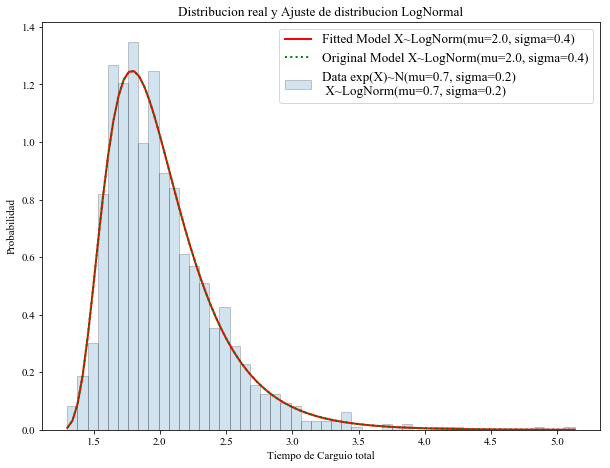

In [25]:
zlog=np.log(z)
mu=np.mean(zlog)
sigma=np.std(zlog)

fitting_params_lognormal = scipy.stats.lognorm.fit(z)
s1,loc1,scale1 = scipy.stats.lognorm.fit(z)
lognorm_dist_fitted = scipy.stats.lognorm(*fitting_params_lognormal)
t = np.linspace(np.min(z), np.max(z), 100)

lognorm_dist = scipy.stats.lognorm(s=s1, loc=loc1, scale=scale1)
# Plot lognormals
f, ax = plt.subplots(1, sharex='col', figsize=(10, 7.5))
ax.hist(z,50 ,density=True, histtype='bar', alpha=0.2 ,label='Data exp(X)~N(mu={0:.1f}, sigma={1:.1f})\n X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(mu, sigma),edgecolor='black')
ax.plot(t, lognorm_dist_fitted.pdf(t), lw=2, color='r',label='Fitted Model X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(lognorm_dist_fitted.mean(), lognorm_dist_fitted.std()))
ax.plot(t, lognorm_dist.pdf(t), lw=2, color='g', ls=':',label='Original Model X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(lognorm_dist.mean(), lognorm_dist.std()))
ax.legend(loc='upper right',fontsize='large')
plt.title('Distribucion real y Ajuste de distribucion LogNormal')
plt.ylabel('Probabilidad')
plt.xlabel('Tiempo de Carguio total')
plt.xlim=(0,5.5)
plt.show()

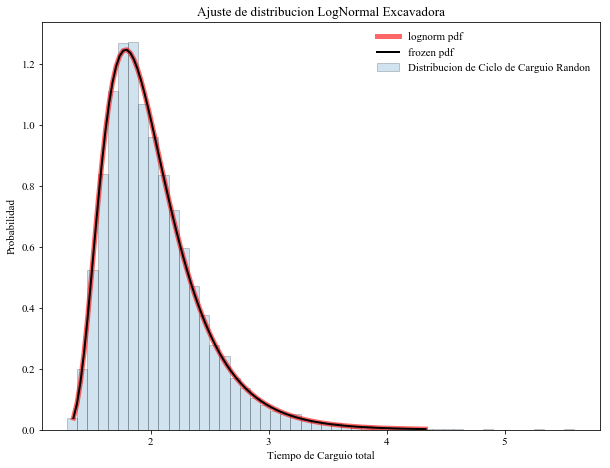

In [26]:
from scipy.stats import lognorm

fig, ax = plt.subplots(1, 1, figsize=(10, 7.5))
s=s1
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')
x = np.linspace(lognorm.ppf(0.001, s,loc=loc1, scale=scale1),lognorm.ppf(0.999, s,loc=loc1, scale=scale1), 100)
ax.plot(x, lognorm.pdf(x, s, loc=loc1, scale=scale1),'r-', lw=5, alpha=0.6, label='lognorm pdf')

rv = lognorm(s ,loc=loc1, scale=scale1)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = lognorm.ppf([0.001, 0.5, 0.999], s)
np.allclose([0.001, 0.5, 0.999], lognorm.cdf(vals, s))
r = lognorm.rvs(s,loc=loc1, scale=scale1, size=10000)          # Ciclo de carguio 

ax.hist(r,50 ,density=True, histtype='bar', alpha=0.2 ,label='Distribucion de Ciclo de Carguio Randon',edgecolor='black')
ax.legend(loc='best', frameon=False)
plt.title('Ajuste de distribucion LogNormal Excavadora')
plt.ylabel('Probabilidad')
plt.xlabel('Tiempo de Carguio total')
plt.show()

### Dimensionamiento de Camiones

La relación camión / cargador es un cálculo aproximado del número de camiones necesarios para mantener el cargador saturado de camiones.

- Rendimiento de efectivo excavadora hidraulica calculo estocastico (ton/hr)

Balde(ton): 54.9
N° de pases teorico: 4.15
N° de pases Real : 4.00
Rendimiento Minimo : 1359.86
Rendimiento Maximo : 5366.23


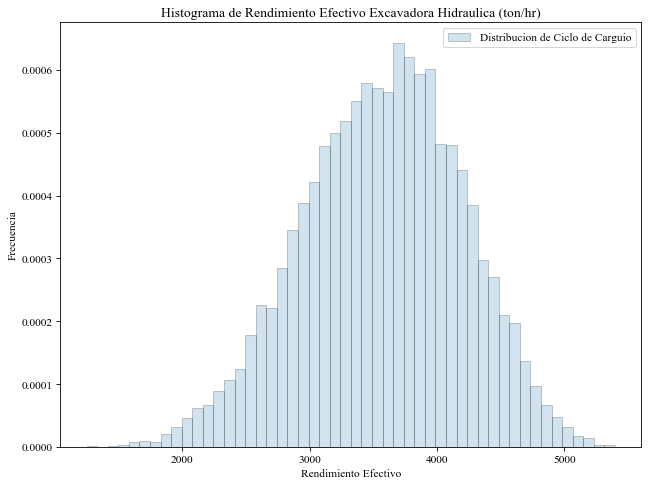

In [27]:
Bucket   = 34                                     # Bucket Capacity m3
Densidad = 2.6                                    # Densidad
Espn     = 0.4                                    # Factor de esponjamiento
Fcs      = 0.87                                   # Factor de llenado
Balde =  Bucket*Densidad/(1+Espn)*Fcs             # tonelaje
print('Balde(ton):',"{0:.1f}".format(Balde))

# Numero de Pases de la Excavadora Hidraulica
Tolva = 240                                       # Capacidad 240 ton.
Fck = 0.95                                        # Factor de llenado Truck.
Pasadas = Tolva*Fck/Balde                         # Numero de pases teorico
Pases_Real = np.round(Pasadas,0)                  # Pases Real
print('N° de pases teorico:',"{0:.2f}".format(Pasadas))
print('N° de pases Real :',"{0:.2f}".format(Pases_Real))

UT = 0.85                                     # Indice de utilizacion pala.
FO = 0.83                                     # Factor Operacional pala.
DF = 0.75                                     # Disponibilidad Fisica pala.
rd_ef_pl=Balde*Pases_Real*UT*FO*DF/(r/60)     # Rendimiento Efectivo de la pala

plmax=Balde*Pases_Real*UT*FO*DF/(zmin/60)     # Rendimiento Minimo
plmin=Balde*Pases_Real*UT*FO*DF/(zmax/60)     # Rendimiento Maximo

print('Rendimiento Minimo :',"{0:.2f}".format(plmin))
print('Rendimiento Maximo :',"{0:.2f}".format(plmax))

plt.figure(figsize=(10,7.5),dpi=75)
plt.hist(rd_ef_pl,50 ,density=True, histtype='bar', alpha=0.2 ,label='Distribucion de Ciclo de Carguio'
         ,edgecolor='black')
plt.title('Histograma de Rendimiento Efectivo Excavadora Hidraulica (ton/hr)')
plt.xlabel('Rendimiento Efectivo')
plt.ylabel('Frecuencia')
plt.legend(loc="upper right")
plt.show()

- Calculo del rendimiento efectivo de los camiones estocastico

In [28]:
size=10000

rt1=[]
rt=[]

for i in range(size):
    n=r[i]
    if n >= zmin and n <=zmax:
        for j in range(size):
            m=r2[j]
            if m >= y1min and m <=y2max:
                rt1=n+m
                rt.append(rt1)
    
rt = pd.DataFrame(rt, columns=['ciclo total transporte'])
round(rt.describe(),0)

,ciclo total transporte
count,99900024.0
mean,21.0
std,3.0
min,16.0
25%,19.0
50%,20.0
75%,22.0
max,40.0


Rendimiento Minimo : 186.78
Rendimiento Maximo : 442.55


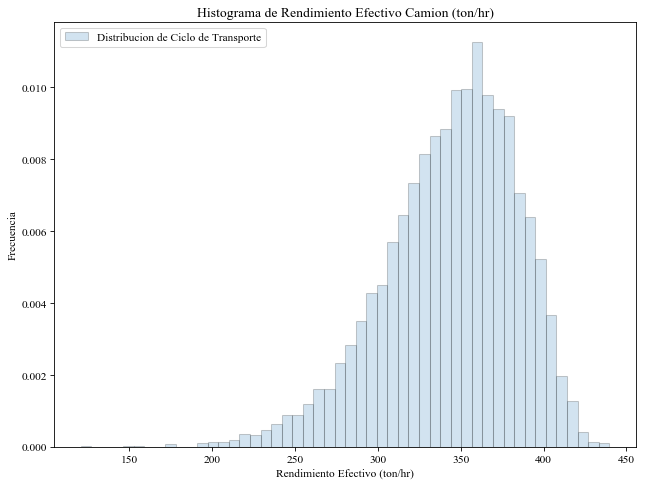

In [29]:
Tolva = 240                                   # Capacidad 240 ton.
Fck = 0.95                                    # Factor de llenado.
UT = 0.73                                     # Indice de utilizacion camion.
FO = 0.83                                     # Factor Operacional camion.
DF = 0.85                                     # Disponibilidad Fisica camion.
                                              # rt Ciclo total de transporte
rd_ef_tk=Tolva*Fck*UT*FO*DF/(r1/60)           # Rendimiento Efectivo del Camion

tkmax=Tolva*Fck*UT*FO*DF/(ymin/60)            # Rendimiento Minimo
tkmin=Tolva*Fck*UT*FO*DF/(ymax/60)            # Rendimiento Maximo

print('Rendimiento Minimo :',"{0:.2f}".format(tkmin))
print('Rendimiento Maximo :',"{0:.2f}".format(tkmax))

plt.figure(figsize=(10,7.5),dpi=75)
plt.hist(rd_ef_tk,50 ,density=True, histtype='bar', alpha=0.2 ,label='Distribucion de Ciclo de Transporte'
         ,edgecolor='black')
plt.title('Histograma de Rendimiento Efectivo Camion (ton/hr)')
plt.xlabel('Rendimiento Efectivo (ton/hr)')
plt.ylabel('Frecuencia')
plt.legend(loc="upper left")
plt.show()

- Rendimiento Efectivo Pala Deterministico

In [30]:
Bucket   = 34                                     # Bucket Capacity 34 m3
Densidad = 2.6                                    # Densidad
Espn     = 0.4                                    # Factor de esponjamiento
Fcs      = 0.87                                   # Factor de llenado
Balde =  Bucket*Densidad/(1+Espn)*Fcs             # tonelaje
print('Balde(ton):',"{0:.1f}".format(Balde))

Tolva = 240                                               # Capacidad 240 ton.
Fck = 0.95                                                # Factor de llenado Truck.
Pasadas = Tolva*Fck/Balde                                 # Numero de pases teorico
Pases_Real = np.round(Pasadas,0)                          # Pases Real
print('N° de pases teorico:',"{0:.2f}".format(Pasadas))
print('N° de pases Real :',"{0:.2f}".format(Pases_Real))

UT = 0.85                                        # Indice de utilizacion pala.
FO = 0.83                                        # Factor Operacional pala.
DF = 0.75                                        # Disponibilidad Fisica pala.
rend_pl=Balde*Pases_Real*UT*FO*DF/(zmean/60)     # Rendimiento Efectivo de la pala
print('Ciclo Carguio :',"{0:.2f}".format(zmean))
print('Rendimiento efectivo Pala :',"{0:.2f}".format(rend_pl),'ton/hr')

Balde(ton): 54.9
N° de pases teorico: 4.15
N° de pases Real : 4.00
Ciclo Carguio : 2.02
Rendimiento efectivo Pala : 3454.60 ton/hr


- Rendimiento Efectivo del Camion Deterministico

In [31]:
Tolva = 240                                          # Capacidad 240 ton.
Fck = 0.95                                           # Factor de llenado.
UT = 0.73                                            # Indice de utilizacion.
FO = 0.83                                            # Factor Operacional.
DF = 0.85                                            # Disponibilidad Fisica.

tp= 1                                                # tiempo de posicionamiento
tc= zmean                                            # tiempo de carguio

# Distancia (mts) ,Velocidad media (km/hr)
d1, v1  =  1500 , 18                                 #  Camion cargado , Gradiente 10%                           
d2, v2  =  1200 , 35                                 #  Camion cargado , Gradiente 0% 
d3, v3  =   800 , 18                                 #  Camion cargado , Gradiente 10% 

d4, v4  =  1500 , 35                                 #  Camion vacio , Gradiente -10%                           
d5, v5  =  1200 , 40                                 #  Camion vacio , Gradiente 0% 
d6, v6  =   800 , 35                                 #  Camion vacio , Gradiente -10% 

ti= ((d1/1000)/v1+(d2/1000)/v2+(d3/1000)/v3)*60      # tiempo de ida
tr= ((d4/1000)/v4+(d5/1000)/v5+(d6/1000)/v6)*60      # tiempo de regreso
td= 2.0                                              # tipo de descarga minutos

ctotal=tp+tc+ti+tr+td                                # Ciclo total de transporte
red_tk=Tolva*Fck*UT*FO*DF/(ctotal/60)                # Rendimiento Efectivo del Camion

print('Ciclo total de Camion :',"{0:.2f}".format(ctotal))
print('Rendimiento efectivo camion :',"{0:.2f}".format(red_tk) , 'ton/hr')

Ciclo total de Camion : 20.49
Rendimiento efectivo camion : 343.91 ton/hr


#### Calculo deterministico de Numero de Camiones

In [32]:
f= 0.05
Ntruct=rend_pl/red_tk
Ntruck=np.round(rend_pl/red_tk+f)
print('N° de Camiones Teorico:',"{0:.2f}".format(Ntruct))
print('N° de Camiones Real:',"{0:.2f}".format(Ntruck))

N° de Camiones Teorico: 10.05
N° de Camiones Real: 10.00


#### Calculo estoctastico Numero de Camiones

In [33]:
size=10000                                      # Alternativa independientes ciclo de transporte y ciclo de carguio.
matchT=0
Match=[]
matchR=[]
f= 0.05                                         # Punto de Corte

for i in range(size):
    n=rd_ef_pl[i]
    if n >= plmin and n <=plmax:
        for j in range(size):
            m=rd_ef_tk[j]
            if m >= tkmin and m <=tkmax:
                matchT=np.round(n/m+f)
                matchR.append(matchT)
    
Match = pd.DataFrame(matchR, columns=['Match'])
round(Match.describe(),0)

,Match
count,99890028.0
mean,11.0
std,2.0
min,3.0
25%,9.0
50%,10.0
75%,12.0
max,28.0


In [34]:
size=10000                                     # Alternativa ciclo de transporte interdependiente del ciclo de carguio
matchT=0
Match=[]
matchR=[]
f= 0.05                                        # Punto de Corte

UTp = 0.85                                     # Indice de utilizacion Pala.
FOp = 0.83                                     # Factor Operacional Pala.
DFp = 0.75                                     # Disponibilidad Fisica Pala.

UTc = 0.73                                     # Indice de utilizacion camion.
FOc = 0.83                                     # Factor Operacional camion.
DFc = 0.85                                     # Disponibilidad Fisica camion.

for i in range(size):
    n=r[i]
    if n >= zmin and n <=zmax:
        for j in range(size):
            m=r2[j]
            if m >= y1min and m <=y2max:
                rd_ef_pl=Balde*Pases_Real*UTp*FOp*DFp/(n/60)
                rd_ef_tk=Tolva*Fck*UTc*FOc*DFc/((m+n)/60)
                matchT=np.round(rd_ef_pl/rd_ef_tk+f)
                matchR.append(matchT)
    
Match = pd.DataFrame(matchR, columns=['Match'])
round(Match.describe(),0)

,Match
count,99900024.0
mean,11.0
std,2.0
min,4.0
25%,9.0
50%,10.0
75%,12.0
max,28.0


In [35]:
Value1,Prob1 =Val_ecdf(matchR,0.5)              # N° de Camiones con 50% de confianza
Value2,Prob2 =Val_ecdf(matchR,0.8)              # N° de Camiones con 80% de confianza
Value3,Prob3 =Val_ecdf(matchR,0.9)              # N° de Camiones con 90% de confianza

value 10.00 Prob: 0.50
value 12.00 Prob: 0.80
value 13.00 Prob: 0.90


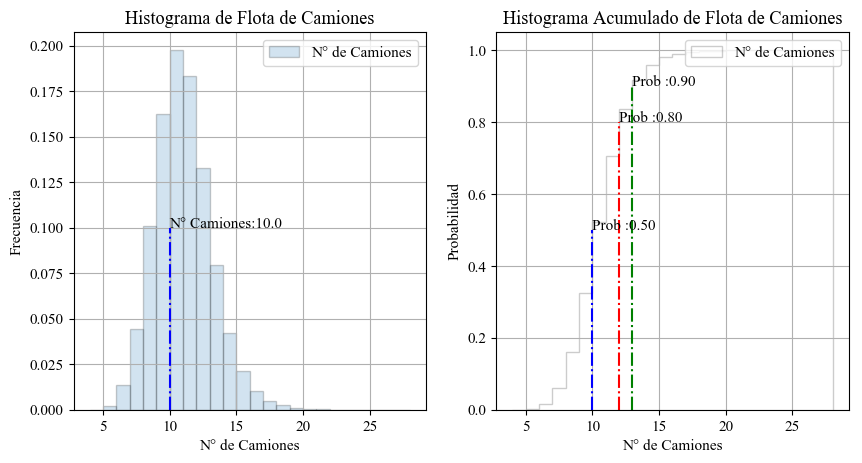

In [36]:
bins=np.max(matchR)-np.min(matchR)+0
bins=bins.astype(int)                           # Convertir en entero

plt.figure(figsize=(10,5),dpi=100)
plt.subplot(1,2,1)
plt.hist(matchR,bins,density=True, histtype='bar', alpha=0.2 ,label='N° de Camiones',edgecolor='black')
plt.plot([Value1,Value1],[0,0.1],'b-.')
plt.text(Value1,0.1,'N° Camiones:'+"{0:.1f}".format(Value1))
plt.title('Histograma de Flota de Camiones')
plt.xlabel('N° de Camiones')
plt.ylabel('Frecuencia')
plt.legend(loc="upper right")
plt.grid()

plt.subplot(1,2,2)
prob=plt.hist(matchR,bins,density=True,cumulative=True, alpha=0.2 ,label='N° de Camiones',histtype='step',edgecolor='black')
plt.plot([Value1,Value1],[0,Prob1],'b-.')
plt.text(Value1,Prob1,'Prob :'+"{0:.2f}".format(Prob1))
plt.plot([Value2,Value2],[0,Prob2],'r-.')
plt.text(Value2,Prob2,'Prob :'+"{0:.2f}".format(Prob2))
plt.plot([Value3,Value3],[0,Prob3],'g-.')
plt.text(Value3,Prob3,'Prob :'+"{0:.2f}".format(Prob3))
plt.title('Histograma Acumulado de Flota de Camiones')
plt.xlabel('N° de Camiones')
plt.ylabel('Probabilidad')
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [37]:
def ecdfh(cdf,N_Camion):                          # Busca la probabilidad para el numero de camiones
    Dato=N_Camion                              
    prob1=cdf[1]
    idx = (np.abs(prob1-Dato)).argmin()
    prob2=cdf[0]
    Prob_Dato=prob2[idx]
    Prob_Dato
    print('N_Camion',"{0:.2f}".format(Dato) ,'Prob:',"{0:.2f}".format(Prob_Dato))
    return[N_Camion,Prob_Dato]

In [38]:
Ncamion12,Prob12=ecdfh(prob,12)                   # Probabilidad de 12 Camiones 
Ncamion11,Prob11=ecdfh(prob,11)                   # Probabilidad de 11 Camiones
Ncamion10,Prob10=ecdfh(prob,10)                   # Probabilidad de 10 Camiones 

N_Camion 12.00 Prob: 0.84
N_Camion 11.00 Prob: 0.70
N_Camion 10.00 Prob: 0.52


In [39]:
Prod10=Ncamion10*red_tk
Prod11=Ncamion11*red_tk
Prod12=Ncamion12*red_tk
print('Produccion de Flota',"{0:.2f}".format(Prod10),'ton/hr',',N° de Camiones:',"{0:.2f}".format(Ncamion10),',Confianza:',"{0:.2f}".format(Prob10))
print('Produccion de Flota',"{0:.2f}".format(Prod11),'ton/hr',',N° de Camiones:',"{0:.2f}".format(Ncamion11),',Confianza:',"{0:.2f}".format(Prob11))
print('Produccion de Flota',"{0:.2f}".format(Prod12),'ton/hr',',N° de Camiones:',"{0:.2f}".format(Ncamion12),',Confianza:',"{0:.2f}".format(Prob12))

Produccion de Flota 3439.13 ton/hr ,N° de Camiones: 10.00 ,Confianza: 0.52
Produccion de Flota 3783.04 ton/hr ,N° de Camiones: 11.00 ,Confianza: 0.70
Produccion de Flota 4126.95 ton/hr ,N° de Camiones: 12.00 ,Confianza: 0.84


- Comentarios:
    
Mayor confiabilidad de flota no equivale a costos mas bajos.

#### Fin